In [1]:
%matplotlib inline
%pylab inline --no-import-all
pylab.rcParams['figure.figsize'] = (18, 10)
pylab.rcParams['figure.dpi'] = (118)
import pandas as pd
from tabulate import tabulate
import requests
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as go_offline
import plotly.graph_objects as go
from scipy.interpolate import interp1d
from scipy import interpolate
from pprint import pprint
import urllib.request, json
import io
import re 
from palettable.colorbrewer.qualitative import Dark2_7

Populating the interactive namespace from numpy and matplotlib


In [2]:
#url = 'https://raw.githubusercontent.com/globalcitizen/2019-wuhan-coronavirus-data/master/data-sources/bno/data/20200201-043100-bno-2019ncov-data.csv'
df = pd.read_csv('https://raw.githubusercontent.com/beoutbreakprepared/nCoV2019/master/ncov_outside_hubei.csv', encoding = "ISO-8859-1")
df2 = pd.read_csv('https://raw.githubusercontent.com/beoutbreakprepared/nCoV2019/master/ncov_hubei.csv', encoding = "ISO-8859-1")
df.tail(10)

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id
4106,4107,NaN,NaN,NaN,NaN,Hong Kong,1,22.270060,114.131150,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4107,4108,31,male,NaN,NaN,Singapore,1,1.281967,103.883501,admin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4108,4109,47,female,NaN,NaN,Singapore,1,1.281284,103.908585,admin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4109,4110,38,male,NaN,NaN,Singapore,1,1.280601,103.933669,admin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4110,4111,20s,female,Jönköping,NaN,Sweden,1,57.782778,14.160556,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4111,4112,NaN,male,NaN,NaN,Thailand,1,15.000000,101.000000,admin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4112,4113,NaN,NaN,NaN,NaN,Thailand,1,15.000000,101.000000,admin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4113,4114,NaN,NaN,NaN,NaN,Thailand,1,15.000000,101.000000,admin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4114,4115,NaN,NaN,NaN,NaN,Thailand,1,15.000000,101.000000,admin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4115,4116,NaN,NaN,NaN,NaN,Thailand,1,15.000000,101.000000,admin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df['city'].nunique()

408

In [4]:
#df['outcome'].value_counts()

In [5]:
#df['date_onset_symptoms'].unique()

In [6]:
df.groupby(['country'])['ID'].count().reset_index(name='count').sort_values(['count'], ascending=False)

,country,count
3,China,4002
19,Thailand,19
10,Japan,14
15,Singapore,13
0,Australia,9
11,Malaysia,7
22,United States,6
5,France,6
6,Germany,6
16,South Korea,6


In [7]:
df.groupby('date_confirmation').count().cumsum()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id
date_confirmation,,,,,,,,,,,,,,,,,,,,,
12.01.2020,1,1,1,1,0,1,1,1,1,1,...,1,0,0,0,1,0,0,0,1,0
15.01.2020,2,2,2,2,1,2,2,2,2,2,...,1,1,1,1,2,0,0,1,2,0
16.01.2020,3,3,3,2,2,3,3,3,3,3,...,1,1,1,1,2,0,0,1,2,0
17.01.2020,4,4,4,3,2,4,4,4,4,4,...,1,1,1,1,3,0,0,1,3,0
19.01.2020,5,5,5,4,3,5,5,5,5,5,...,1,1,1,1,3,0,1,2,4,0
20.01.2020,16,12,12,9,13,16,16,16,16,16,...,1,1,1,1,4,0,5,12,15,0
21.01.2020,50,36,36,43,47,50,50,50,50,50,...,1,2,1,1,6,12,25,46,49,0
22.01.2020,92,74,75,82,89,92,92,92,92,92,...,1,2,1,3,8,22,56,88,91,0
23.01.2020,184,116,117,170,179,184,184,184,184,184,...,1,2,1,3,13,25,138,178,183,0


In [8]:
pd.to_numeric(df['age'], errors='coerce').mean()

43.30696202531646

In [9]:
#df_by_country = df.groupby('country')

In [10]:
bydate_country = df.groupby(['country', 'date_confirmation']).size().to_frame('num')
bydate_country = bydate_country.sort_index(level=1)
#cuminf = bydate_country.cumsum()

In [25]:
#bydate_country.plot('date_confirmation', 'country')
#bydate_country.index
#plt.style.use('seaborn-whitegrid')
#fig,ax = plt.subplots()
#totminch = bydate_country.drop(index='China').cumsum().interpolate()
#minch = bydate_country.drop(index='China').unstack(level=0).cumsum().interpolate()
#totminch.reset_index(drop=True, inplace=True)

#totminch.groupby('date_confirmation')
#totminch = totminch.groupby(level = 1)
#totminch



In [12]:
#bydate_country.drop(index = 'China').index

In [13]:
nhubeicase = df.groupby('date_confirmation')['ID'].count().reset_index(name='count').sort_values(['date_confirmation'], ascending=True)
hubeicase = df2.groupby('date_confirmation')['ID'].count().reset_index(name='count').sort_values(['date_confirmation'], ascending=True)

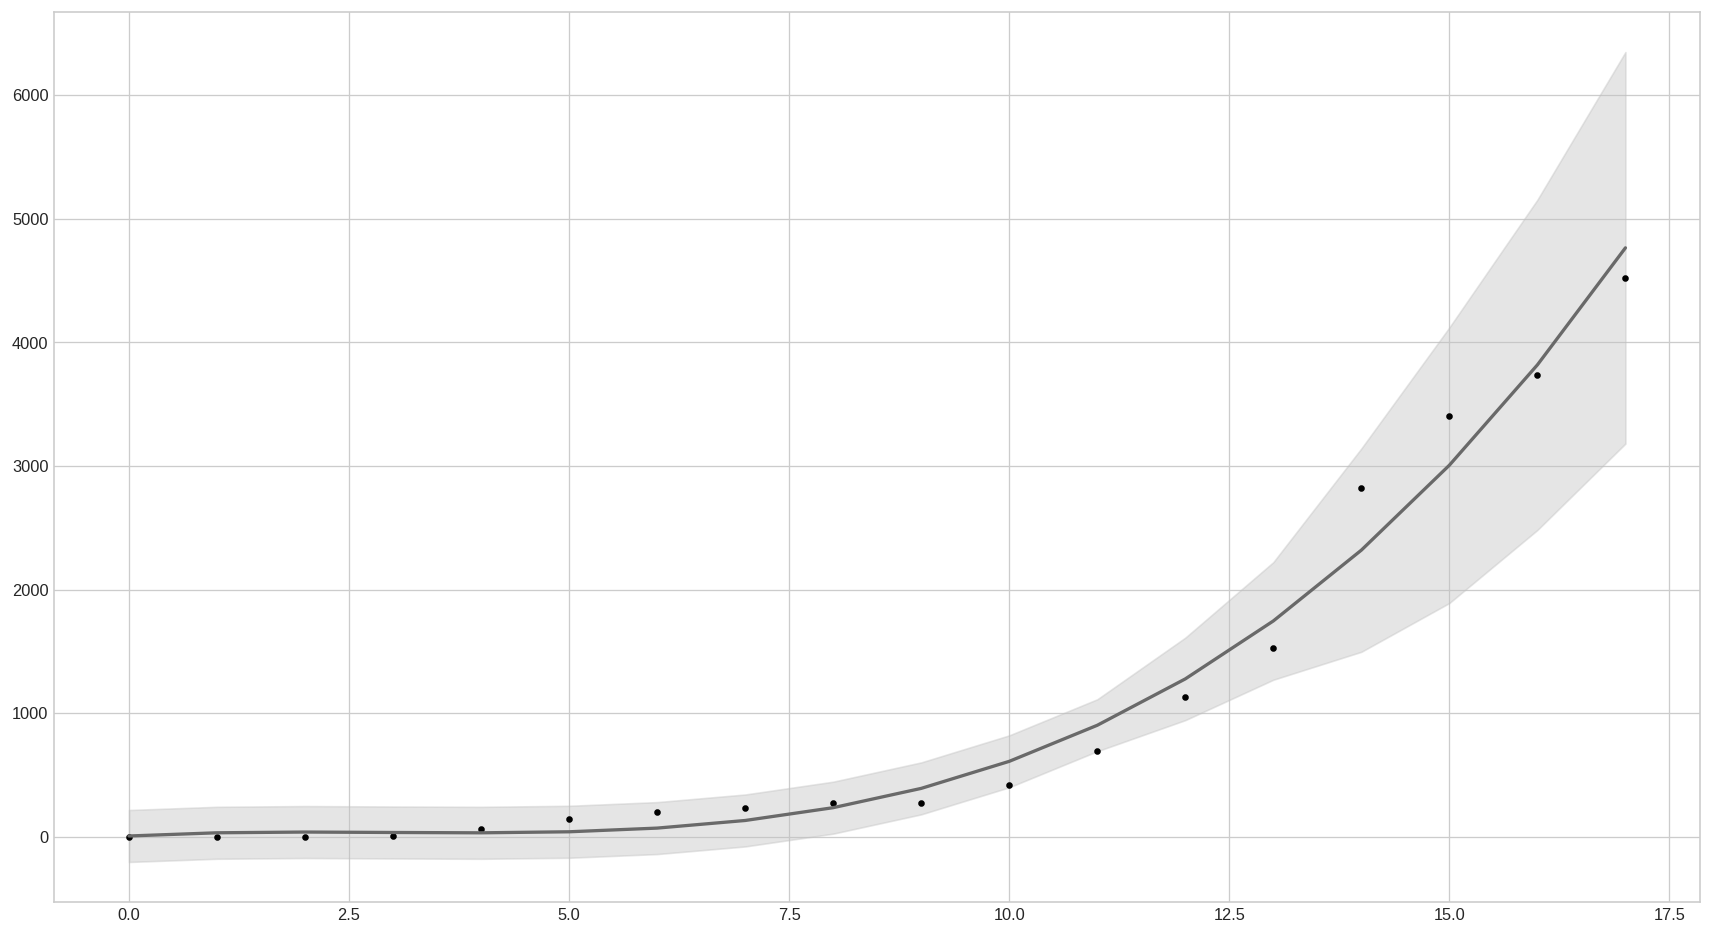

In [14]:
plt.style.use('seaborn-whitegrid')
#plt.rcParams['figure.facecolor'] = 'grey'
#plt.rcParams['axes.facecolor'] = 'grey'
fig,ax = plt.subplots()

frames = [nhubeicase, hubeicase]
totalcases = pd.concat((frames), axis=0).sort_index(level=0, ascending=True)
totalcases = totalcases[totalcases.date_confirmation != 'not sure']
totalcases = totalcases.groupby(['date_confirmation'],as_index=False).first()
totalcases['count'] = totalcases['count'].cumsum()

#totalcases.head(1000)

#smooth_cases = interp1d(totalcases.index, totalcases['count'],kind='cubic')

#totalcases.plot(kind='line', x='date_confirmation', y='count', legend='best', ax=ax)
n_steps = 12
x = totalcases.index
y = totalcases['count']

ystd = y.rolling(n_steps).std().bfill(axis = 0) 

yinterp = interpolate.UnivariateSpline(x, y, s = 5e9)(x)

#smooth_path = y.rolling(n_steps).mean()
#path_deviation = 2 * y.rolling(n_steps).std()
#plt.plot(smooth_path, linewidth=2)
#sy = y.rolling(n_steps).std()
under_line = (yinterp-ystd)
over_line  = (yinterp+ystd)

#uinterp = interpolate(x, under_line, s = 5e8)(x)
#ointerp = interpolate(x, over_line, s = .5e8)(x)

#plt.plot(under_line, linewidth=1)
plt.plot(x, y, 'k.', label = 'Original')
plt.plot(x, yinterp, 'dimgrey', label = 'Interpolated', linewidth=2)
plt.fill_between(y.index, under_line, over_line, color='silver', alpha=.4) #std curves.
plt.show()


In [15]:
ystd.bfill(axis = 0) 


0      210.174098
1      210.174098
2      210.174098
3      210.174098
4      210.174098
5      210.174098
6      210.174098
7      210.174098
8      210.174098
9      210.174098
10     210.174098
11     210.174098
12     333.622814
13     475.616370
14     822.407884
15    1114.513700
16    1335.496579
17    1583.471012
Name: count, dtype: float64

In [16]:
####GEODOSE###
url = 'https://docs.google.com/spreadsheets/d/18X1VM1671d99V_yd-cnUI1j8oSG2ZgfU_q1HfOizErA/export?format=csv&id'
data = pd.read_csv(url)
data = data.fillna(0)
data.head()

,country,location_id,location,latitude,longitude,confirmedcases_10-01-2020,deaths_10-01-2020,confirmedcases_11-01-2020,deaths_11-01-2020,confirmedcases_12-01-2020,...,confirmedcases_30-01-2020,deaths_30-01-2020,confirmedcases_31-01-2020,deaths_31-01-2020,confirmedcases_01-02-2020,deaths_01-02-2020,confirmedcases_02-02-2020,deaths_02-02-2020,confirmedcases_03-02-2020,deaths_03-02-2020
0,Australia,470,New South Wales,-32.330,146.770,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0,4,0.0
1,Australia,476,Victoria,-36.980,144.640,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,3.0,0.0,4.0,0.0,4.0,0.0,4,0.0
2,Australia,473,Queensland,-22.900,144.700,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,2,0.0
3,Australia,474,South Australia,-29.490,135.950,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2,0.0
4,Cambodia,802,Sihanoukville,10.616,103.578,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,0.0


In [17]:
cases = data[data.columns.drop(list(data.filter(regex='deaths|location|latitude|longitude')))]
deaths = data[data.columns.drop(list(data.filter(regex='deaths|location|latitude|longitude')))]

cases = cases.rename(columns=lambda x: re.sub("confirmedcases_", "", x))
deaths.rename(columns=lambda x: x[10:0], inplace=True)

case_bycountry = cases.groupby(['country'],as_index=False).first()

/home/feynman/.local/lib/python3.6/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
case_bycountry.tail(50)

,country,10-01-2020,11-01-2020,12-01-2020,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,...,25-01-2020,26-01-2020,27-01-2020,28-01-2020,29-01-2020,30-01-2020,31-01-2020,01-02-2020,02-02-2020,03-02-2020
0,Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4
1,Cambodia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2,Canada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3
3,China,44.0,44.0,44.0,44.0,44.0,44.0,45.0,62.0,121.0,...,1058.0,1423.0,2714.0,3554.0,4586.0,5806.0,7153.0,9074.0,11177.0,13522
4,Finland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1
5,France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,3.0,4.0,5.0,5.0,5.0,5.0,5
6,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,4.0,4.0,5.0,7.0,8.0,8.0,10
7,Hong-Kong,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,8.0,8.0,8.0,8.0,12.0,13.0,14.0,15.0,15
8,India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,3
9,Italy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2


In [22]:
print(plt.style.available)

['seaborn-talk', 'seaborn-dark-palette', 'Solarize_Light2', 'grayscale', 'seaborn', 'dark_background', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-poster', 'seaborn-pastel', '_classic_test', 'seaborn-paper', 'seaborn-muted', 'ggplot', 'seaborn-white', 'classic', 'seaborn-notebook', 'seaborn-ticks', 'seaborn-colorblind', 'fivethirtyeight', 'seaborn-whitegrid', 'bmh', 'tableau-colorblind10', 'seaborn-dark', 'seaborn-bright', 'fast']


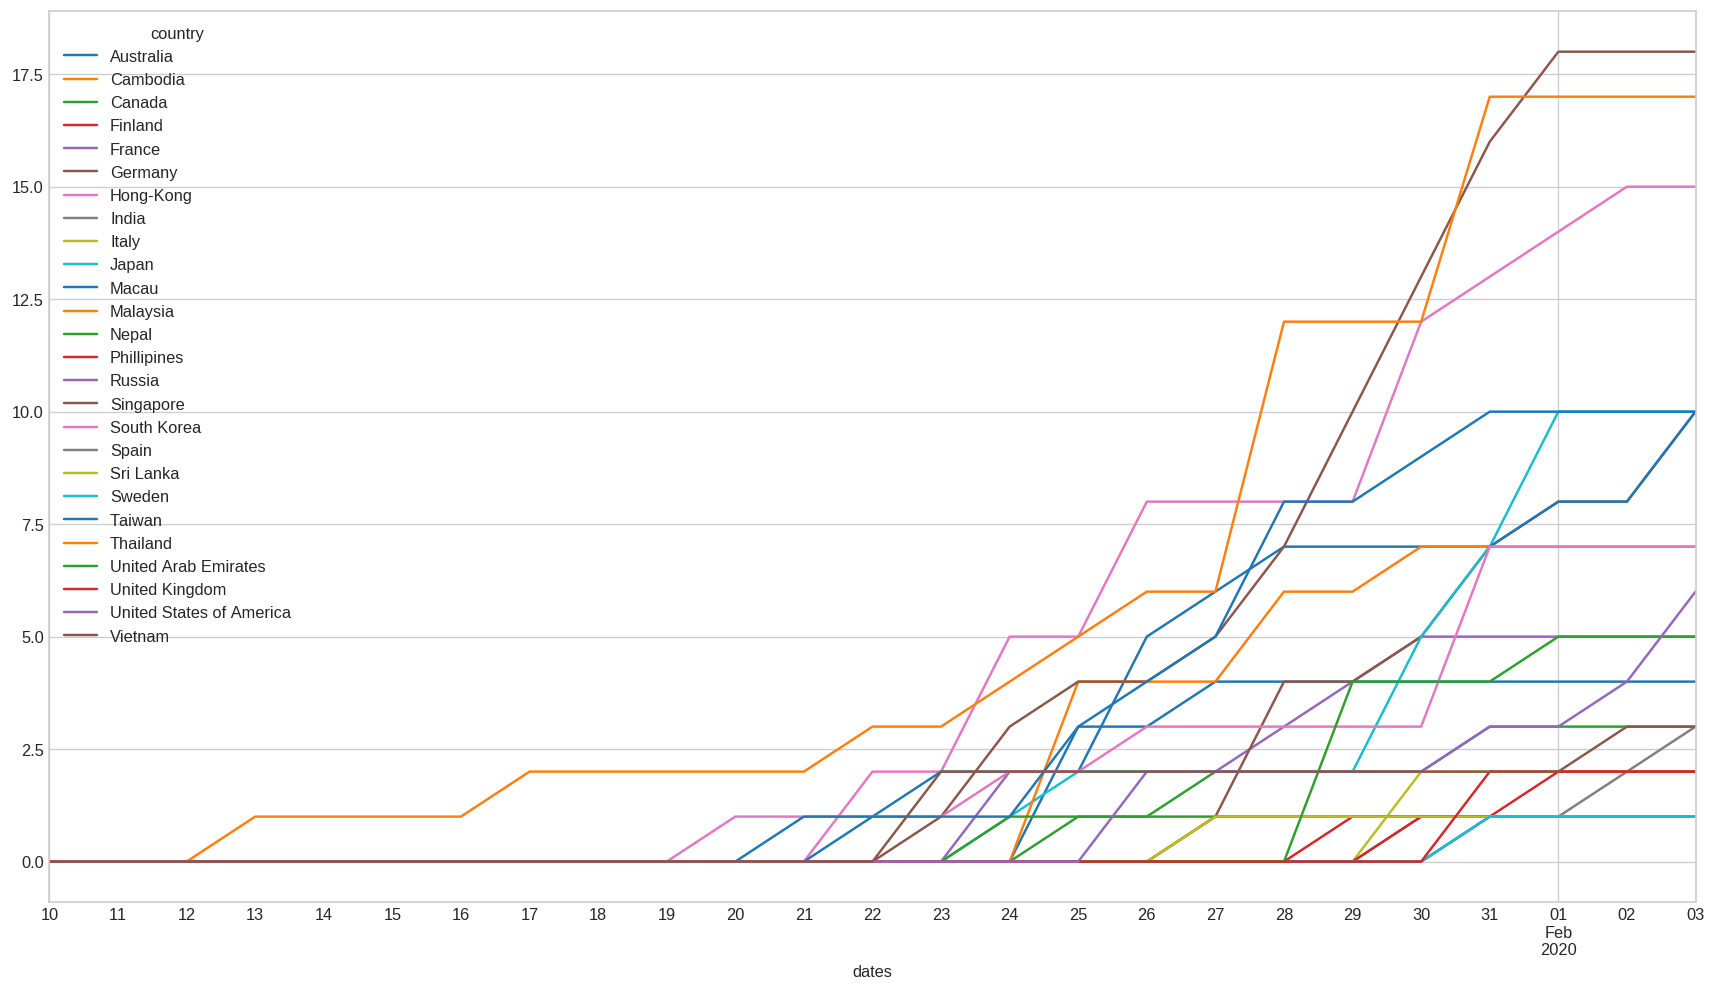

In [24]:
jc = case_bycountry[case_bycountry.country != 'China']
#jc = jc.set_index('country')
reshaped_jc = pd.melt(jc, id_vars=["country"], var_name="dates")
jc = reshaped_jc.pivot(index='dates', columns='country', values='value')

jc.index = pd.to_datetime(jc.index,format='%d-%m-%Y')
jc = jc.sort_values(by=['dates'], ascending=False)
jc.plot()